In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [129]:
df = pd.DataFrame({'a':[1,2,3,4,5,6,7,8,9,10,1,1,1,1,1,3,5,2,11],
                   'a2':[1,2,3,4,5,6,7,8,9,10,1,1,1,1,1,3,5,2,-2],
                 'b':[2,4,5,7,11,10,12,18,20,20,1,2,3,4,2,5,11,4,3]})
df.head(3)

,a,a2,b
0,1,1,2
1,2,2,4
2,3,3,5


In [231]:
class gd(object):
    
    def __init__(self,eta = 0.05, n_iterations = 20):
        self.eta = eta
        self.n_iterations = n_iterations
        
    def fit(self,X,y):
        error_cont =[]
        theta_cont = []
        theta = np.random.randn(X.shape[1],1) #shape nx,1 -->> initial weights
        print(f'initial weights: {theta}')
        for i in range(1,self.n_iterations+1):
            #print(weights.shape)
            y_pred = np.dot(X,theta) # m,nx
            #print(y_pred.shape)
            error = mean_absolute_error(y,y_pred)
            grads = 2/len(y) * np.sum(np.dot(X.T,(y_pred,-y)))
            theta = theta - self.eta * grads
            error_cont.append(error)
            theta_cont.append(theta)
            print(f'iteration: {i} // grads: {grads} // weights: {theta} // Cost error: {error}' )
        return theta,error_cont,theta_cont
        

In [234]:
theta, error, theta_cont = gd(eta = 0.01, n_iterations = 1000).fit(df[['a']],df[['b']])

initial weights: [[0.47855899]]
iteration: 1 // grads: -66.97590659262507 // weights: [[1.14831806]] // Cost error: 5.777106283689612
iteration: 2 // grads: -28.27088267751858 // weights: [[1.43102689]] // Cost error: 3.712940558899081
iteration: 3 // grads: -11.933288372299952 // weights: [[1.55035977]] // Cost error: 2.864814078573523
iteration: 4 // grads: -5.037103828728732 // weights: [[1.60073081]] // Cost error: 2.506815427404525
iteration: 5 // grads: -2.1261880371791544 // weights: [[1.62199269]] // Cost error: 2.3557023125426633
iteration: 6 // grads: -0.8974751609566977 // weights: [[1.63096744]] // Cost error: 2.291916671427289
iteration: 7 // grads: -0.3788289889932912 // weights: [[1.63475573]] // Cost error: 2.264992416598588
iteration: 8 // grads: -0.15990571009084115 // weights: [[1.63635479]] // Cost error: 2.253627546928789
iteration: 9 // grads: -0.06749704183837485 // weights: [[1.63702976]] // Cost error: 2.248830375626064
iteration: 10 // grads: -0.02849085660756

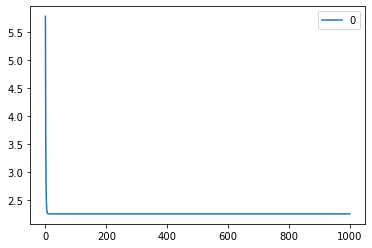

In [235]:
pd.DataFrame(error).plot()

In [236]:
theta

array([[1.63752277]])

In [237]:
def normal_eq(X,y):
    inverse = np.linalg.inv(np.dot(X.T,X))
    diff = np.dot(X.T,y)
    return np.dot(inverse,diff)

In [238]:
normal_eq(df[['a']],df[['b']])

array([[1.63752277]])

In [239]:
weights

[array([[12.96233864]]),
 array([[-39.05856067]]),
 array([[156.30881674]]),
 array([[-577.40422288]]),
 array([[2178.09585927]]),
 array([[-8170.33778259]]),
 array([[30693.7796724]]),
 array([[-115262.57254747]]),
 array([[432884.61690049]]),
 array([[-1625712.60569295]])]